In [1]:
import numpy as np
import pandas as pd

import plotly as py
import plotly_express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix
#import scikitplot as skplt

In [2]:
df = pd.read_csv("BankChurners.csv")
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

###  数据基本信息

In [3]:
df.shape

# 结果
(10127, 23)

(10127, 23)

In [4]:
# 全部字段
columns = df.columns
columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

#### 字段解释为：

CLIENTNUM：Client number - Unique identifier for the customer holding the account  

Attrition_Flag：Flag indicative of account closure in next 6 months (between Jan to Jun 2013)

Customer_Age：Age of the account holder

Gender：Gender of the account holder

Dependent_count：Number of people financially dependent on the account holder

Education_Level：Educational qualification of account holder (ex - high school, college grad etc.)

Marital_Status：Marital status of account holder (Single, Married, Divorced, Unknown)

Income_Category：Annual income category of the account holder

Card_Category：Card type depicting the variants of the cards by value proposition (Blue, Silver and Platinum)

Months_on_book：Number of months since the account holder opened an an account with the lender

Total_Relationship_Count：Total number of products held by the customer. Total number of relationships the account holder has with the bank (example - retail bank, mortgage, wealth management etc.)

Months_Inactive_12_mon：Total number of months inactive in last 12 months

Contacts_Count_12_mon：Number of Contacts in the last 12 months. No. of times the account holder called to the call center in the past 12 months

Credit_Limit：Credit limit

Total_Revolving_Bal：Total amount as revolving balance

Avg_Open_To_Buy：Open to Buy Credit Line (Average of last 12 months)

Total_Amt_Chng_Q4_Q1：Change in Transaction Amount (Q4 over Q1)

Total_Trans_Amt：Total Transaction Amount (Last 12 months)

Total_Trans_Ct：Total Transaction Count (Last 12 months)

Total_Ct_Chng_Q4_Q1：Change in Transaction Count (Q4 over Q1)

Avg_Utilization_Ratio：Average Card Utilization Ratio

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactivity

In [5]:
df.dtypes   # 字段类型; 部分截图

CLIENTNUM                                                                                                                               int64
Attrition_Flag                                                                                                                         object
Customer_Age                                                                                                                            int64
Gender                                                                                                                                 object
Dependent_count                                                                                                                         int64
Education_Level                                                                                                                        object
Marital_Status                                                                                                                         object
Income

In [6]:
# 不同字段类型的统计
#通过下面的代码能够统计不同类型下的字段数量：
pd.value_counts(df.dtypes)

int64      10
float64     7
object      6
dtype: int64

In [7]:
df.describe().style.background_gradient(cmap="ocean_r")  # 表格美化输出

### 缺失值

In [8]:

# 缺失值比例：数据中没有缺失值
total = df.isnull().sum().sort_values(ascending=False)
Percentage = total / len(df)

# 每个字段的缺失值统计
df.isnull().sum()

CLIENTNUM                                                                                                                             0
Attrition_Flag                                                                                                                        0
Customer_Age                                                                                                                          0
Gender                                                                                                                                0
Dependent_count                                                                                                                       0
Education_Level                                                                                                                       0
Marital_Status                                                                                                                        0
Income_Category                                 

#### 根据值的降序排列，第一个是0，结果表明数据本身是没有缺失值的**

### 删除无关字段

In [9]:
no_use = np.arange(21, df.shape[1])  # 最后两个字段
no_use

array([21, 22])

In [10]:
# 1、删除多个字段
df.drop(df.columns[no_use], axis=1, inplace=True)

In [11]:
#CLIENTNUM表示的客户编号的信息，对建模无用直接删除：
# 2、删除单个字段
df.drop("CLIENTNUM", axis=1, inplace=True)


In [12]:
#新生成的df的字段（删除了无效字段之后）：
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [13]:
#再次查看数据的描述统计信息：
df.describe().style.background_gradient(cmap="ocean_r")


### EDA-Exploratory Data Analysis

In [14]:
#基于使用频率和数值特征
#取出和用户的数值型字段信息：
# df_frequency = df[["Customer_Age","Total_Trans_Ct","Total_Trans_Amt","Months_Inactive_12_mon","Credit_Limit","Attrition_Flag"]]  效果同下

df_frequency = pd.concat([df['Customer_Age'],
                        df['Total_Trans_Ct'],
                        df['Total_Trans_Amt'],
                        df['Months_Inactive_12_mon'],
                        df['Credit_Limit'],
                        df['Attrition_Flag']],
                       axis=1)

df_frequency.head()

Customer_Age  Total_Trans_Ct  Total_Trans_Amt  Months_Inactive_12_mon  \
0            45              42             1144                       1   
1            49              33             1291                       1   
2            51              20             1887                       1   
3            40              20             1171                       4   
4            40              28              816                       1   

   Credit_Limit     Attrition_Flag  
0       12691.0  Existing Customer  
1        8256.0  Existing Customer  
2        3418.0  Existing Customer  
3        3313.0  Existing Customer  
4        4716.0  Existing Customer

In [15]:
#探索在不同的Attrition_Flag下，两两字段之间的关系：
df["Attrition_Flag"].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

#### 结果表明：现有顾客为8500，流失客户为1627

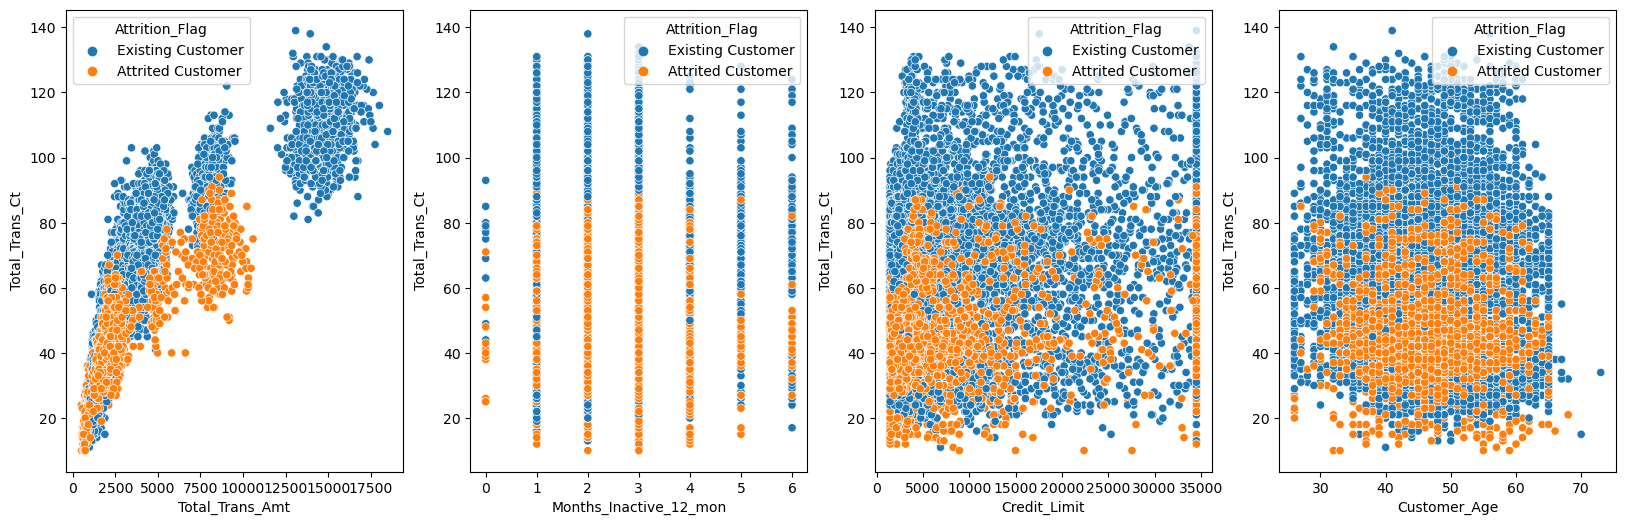

In [16]:
# 定义画布大小

fig, ax = plt.subplots(ncols=4, figsize=(20,6))

sns.scatterplot(data=df_frequency,
                x="Total_Trans_Amt",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[0])

sns.scatterplot(data=df_frequency,
                x="Months_Inactive_12_mon",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[1])

sns.scatterplot(data=df_frequency,
                x="Credit_Limit",
                y="Total_Trans_Ct",
                hue="Attrition_Flag",
                ax=ax[2])

sns.scatterplot(data=df_frequency,
              x="Customer_Age",
              y="Total_Trans_Ct",
              hue="Attrition_Flag",
              ax=ax[3])

plt.show()


In [17]:
#基于plotly的实现：
for col in ["Customer_Age","Total_Trans_Amt","Months_Inactive_12_mon","Credit_Limit"]:
    fig = px.scatter(df_frequency,
                     x=col,
                     y="Total_Trans_Ct",
                     color="Attrition_Flag")
    fig.show()

In [18]:
#上面展示的一个字段和Total_Trans_Ct的关系。下面是基于go.Scatter实现：

# 生成一个副本

df_frequency_copy = df_frequency.copy()
df_frequency_copy["Attrition_Flag_number"] = df_frequency_copy["Attrition_Flag"].apply(lambda x: 1 if x == "Existing Customer" else 2)

# 两个基本参数：设置行、列

four_columns = ["Total_Trans_Amt","Months_Inactive_12_mon","Credit_Limit","Customer_Age"]

fig = make_subplots(rows=1,
                    cols=4,
                    start_cell="top-left",
                    shared_yaxes=True,
                    subplot_titles=four_columns  # 子图
                   )

for i, v in enumerate(four_columns):
    r = i // 4 + 1  # 行
    c = (i + 1) % 4  # 列-余数

    if c == 0:
        fig.add_trace(go.Scatter(x=df_frequency_copy[v].tolist(),
                             y=df_frequency_copy["Total_Trans_Ct"].tolist(),
                             mode='markers',
                             marker=dict(color=df_frequency_copy.Attrition_Flag_number)),
                 row=r, col=4)

    else:
        fig.add_trace(go.Scatter(x=df_frequency_copy[v].tolist(),
                             y=df_frequency_copy["Total_Trans_Ct"].tolist(),
                             mode='markers',
                             marker=dict(color=df_frequency_copy.Attrition_Flag_number)),

                 row=r, col=c)

fig.update_layout(width=1000, height=450, showlegend=False)

fig.show()

#### 蓝色：现有客户；黄色：流失客户

我们得到如下的几点结论：


图1：用户每年花费的金额越高，越可能留下来（非流失）

2-3个月不进行互动，用户流失的可能性较高

用户的信用额度越高，留下来的可能性越大

从图3中观察到：流失客户的信用卡使用次数大部分低于100次

从第4个图中观察到，用户年龄分布不是重要因素

### 基于用户人口统计信息
用户的人口统计信息主要是包含：用户年龄、性别、受教育程度、状态（单身、已婚等）、收入水平等信息

In [19]:
#取出相关的字段进行分析：

df_demographic=df[['Customer_Age',
                   'Gender',
                   'Education_Level',
                   'Marital_Status',
                   'Income_Category',
                   'Attrition_Flag']]

df_demographic.head()


Customer_Age Gender Education_Level Marital_Status Income_Category  \
0            45      M     High School        Married     $60K - $80K   
1            49      F        Graduate         Single  Less than $40K   
2            51      M        Graduate        Married    $80K - $120K   
3            40      F     High School        Unknown  Less than $40K   
4            40      M      Uneducated        Married     $60K - $80K   

      Attrition_Flag  
0  Existing Customer  
1  Existing Customer  
2  Existing Customer  
3  Existing Customer  
4  Existing Customer

In [20]:
#不同类型顾客的年龄分布
px.violin(df_demographic,
          y="Customer_Age",
          color="Attrition_Flag")

从上面的小提琴图看出来，不同类型的用户在年龄上的分布是类似的。

结论：年龄并不是用户是否流失的关键因素

In [21]:
#顾客的年龄分布
fig = make_subplots(rows=2, cols=1)

trace1=go.Box(x=df['Customer_Age'],name='Age With Box Plot',boxmean=True)
trace2=go.Histogram(x=df['Customer_Age'],name='Age With Histogram')

fig.add_trace(trace1, row=1,col=1)
fig.add_trace(trace2, row=2,col=1)

fig.update_layout(height=500, width=1000, title_text="用户年龄分布")
fig.show()


In [22]:
#不同类型下不同性别顾客统计
flag_gender = df.groupby(["Attrition_Flag","Gender"]).size().reset_index().rename(columns={0:"number"})
flag_gender

Attrition_Flag Gender  number
0  Attrited Customer      F     930
1  Attrited Customer      M     697
2  Existing Customer      F    4428
3  Existing Customer      M    4072

In [23]:
fig = px.bar(flag_gender,
             x="Attrition_Flag",
             y="number",
             color="Gender",
             barmode="group",
             text="number")

fig.show()

从上面的柱状图中看出来：

女性在本次数据中高于男性；在两种不同类型的客户中女性也是高于男性

数据不平衡：现有客户和流失客户是不平衡的，大约是8400:1600

### 交叉表统计分析

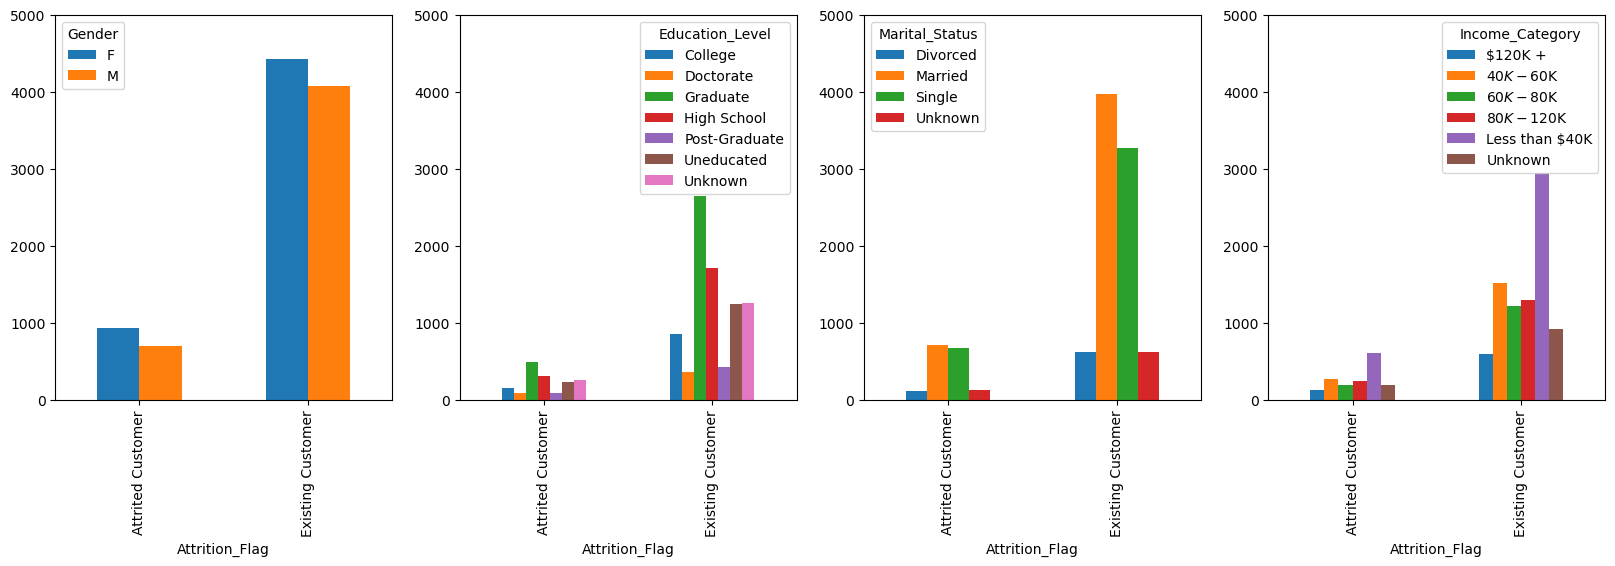

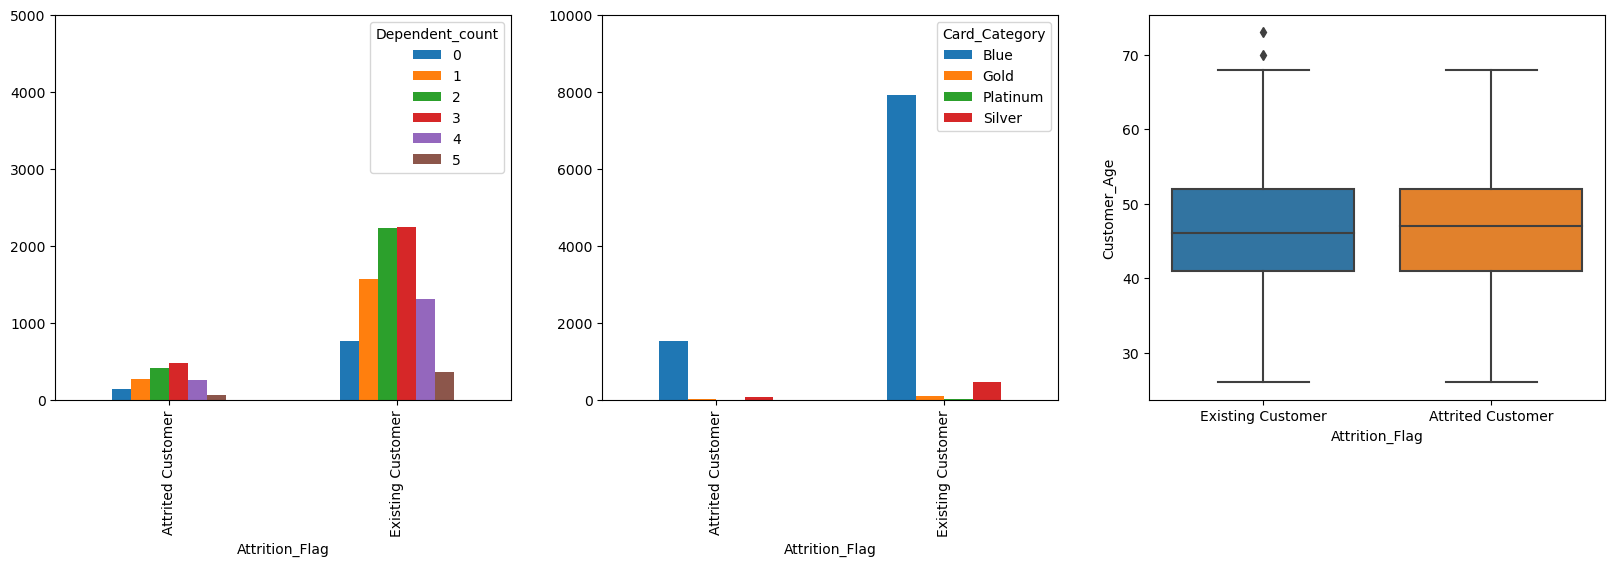

In [24]:
#基于pandas中交叉表的数据统计分析。解释交叉表很好的文章：https://pbpython.com/pandas-crosstab.html

fig, (ax1,ax2,ax3,ax4) = plt.subplots(ncols=4, figsize=(20,5))

pd.crosstab(df["Attrition_Flag"],df["Gender"]).plot(kind="bar", ax=ax1, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Education_Level"]).plot(kind="bar", ax=ax2, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Marital_Status"]).plot(kind="bar", ax=ax3, ylim=[0,5000])
pd.crosstab(df["Attrition_Flag"],df["Income_Category"]).plot(kind="bar", ax=ax4, ylim=[0,5000])


fig, (ax1,ax2,ax3) = plt.subplots(ncols=3, figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax1, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])

_box = sns.boxplot(data=df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

plt.show()

#### 可以观察到：在两种客户中，不同的教育水平和个人状态的分布是类似的。这个结论也验证了：年龄并不是影响现有或者流失客户的因素。

### 受教育程度

In [25]:
fig = px.pie(df,names='Education_Level',title='Propotion Of Education Levels')
fig.show()

### 对比两种客户数量

In [26]:
churn = df["Attrition_Flag"].value_counts()
churn

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [27]:
churn.keys()

Index(['Existing Customer', 'Attrited Customer'], dtype='object')

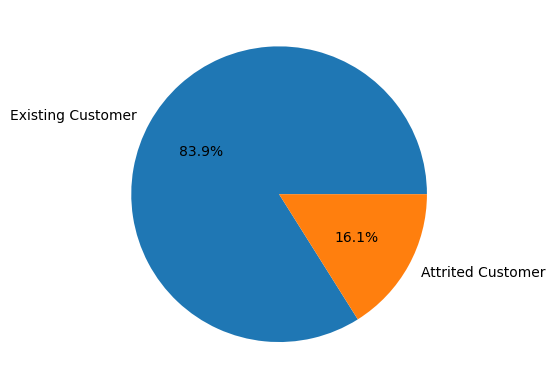

In [28]:
plt.pie(x=churn, labels=churn.keys(),autopct="%.1f%%")

plt.show()

#### 上面的饼图表明：

现有客户还是占据了绝大部分
后面将通过采样的方式使得两种类型的客户数量保持平衡。

### 相关性
现有数据中的字段涉及到分类型和数值型，采取不同的分析和编码方式

数值型变量：使用相关系数Pearson

分类型变量：使用Cramer’s V ；克莱姆相关系数，常用于分析双变量之间的关系

参考内容：https://blog.csdn.net/deecheanW/article/details/120474864

In [29]:
# 字符型字段
# 相同效果：df.select_dtypes(include="O")
df_categorical=df.loc[:,df.dtypes==np.object_]
df_categorical.head()

# 数值型字段
df_number = df.select_dtypes(exclude="O")
df_number.head()

Customer_Age  Dependent_count  Months_on_book  Total_Relationship_Count  \
0            45                3              39                         5   
1            49                5              44                         6   
2            51                3              36                         4   
3            40                4              34                         3   
4            40                3              21                         5   

   Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                       1                      3       12691.0   
1                       1                      2        8256.0   
2                       1                      0        3418.0   
3                       4                      1        3313.0   
4                       1                      0        4716.0   

   Total_Revolving_Bal  Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  \
0                  777          11914.0                 1.335   
1                  864           7392.0                 1.541   
2                    0           3418.0                 2.594   
3                 2517            796.0                 1.405   
4                    0           4716.0                 2.175   

   Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  
0             1144              42                1.625                  0.061  
1             1291              33                3.714                  0.105  
2             1887              20                2.333                  0.000  
3             1171              20                2.333                  0.760  
4              816              28                2.500                  0.000

对Attrition_Flag字段执行独热码编码操作：

In [30]:
# 先保留原信息
df_number["Attrition_Flag"] = df.loc[:, "Attrition_Flag"]

### 类型编码

In [31]:
from sklearn import preprocessing

label = preprocessing.LabelEncoder()
df_categorical_encoded = pd.DataFrame()

# 对分类型的字段进行类型编码
for i in df_categorical.columns:
    df_categorical_encoded[i] = label.fit_transform(df_categorical[i])

In [72]:
### 计算克莱姆系数-cramers_V

In [32]:
from scipy.stats import chi2_contingency

# 定义计算克莱姆系数的函数
def cal_cramers_v(v1,v2):
    crosstab = np.array(pd.crosstab(v1,v2,rownames=None,colnames=None))
    stat = chi2_contingency(crosstab)[0]

    obs = np.sum(crosstab)
    mini = min(crosstab.shape) - 1

    return stat / (obs * mini)


In [33]:
rows = []
for v1 in df_categorical_encoded:
    col = []
    for v2 in df_categorical_encoded:
        # 计算克莱姆系数
        cramers = cal_cramers_v(df_categorical_encoded[v1],df_categorical_encoded[v2])
        col.append(round(cramers, 2))
    rows.append(col)

In [34]:
# 克莱姆系数下的热力图

cramers_results = np.array(rows)

cramerv_matrix = pd.DataFrame(cramers_results,
                              columns=df_categorical_encoded.columns,
                              index=df_categorical_encoded.columns)
cramerv_matrix.head()

Attrition_Flag  Gender  Education_Level  Marital_Status  \
Attrition_Flag              1.0     0.0              0.0             0.0   
Gender                      0.0     1.0              0.0             0.0   
Education_Level             0.0     0.0              1.0             0.0   
Marital_Status              0.0     0.0              0.0             1.0   
Income_Category             0.0     0.7              0.0             0.0   

                 Income_Category  Card_Category  
Attrition_Flag               0.0           0.00  
Gender                       0.7           0.01  
Education_Level              0.0           0.00  
Marital_Status               0.0           0.00  
Income_Category              1.0           0.00

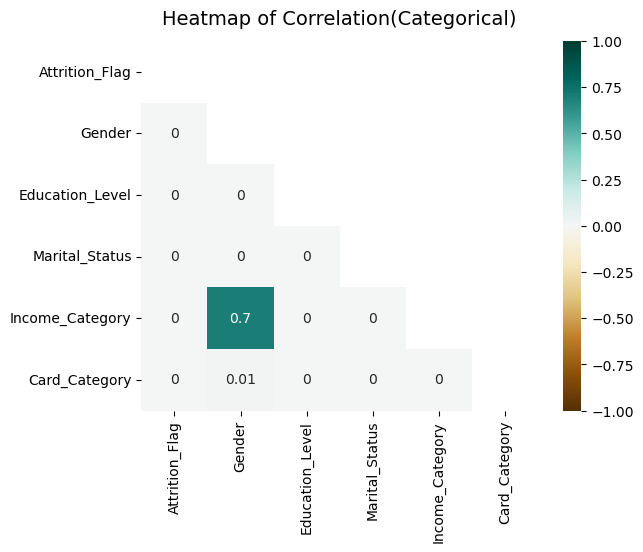

In [35]:
#绘制相关的热力图：
mask = np.triu(np.ones_like(cramerv_matrix, dtype=np.bool_))
cat_heatmap = sns.heatmap(cramerv_matrix, # 系数矩阵
                          mask=mask,
                          vmin=-1,
                          vmax=1,
                          annot=True,
                          cmap="BrBG")

cat_heatmap.set_title("Heatmap of Correlation(Categorical)", fontdict={"fontsize": 14}, pad=12)

plt.show()

In [36]:
df_number['Existing Customer']=df_number['Attrition_Flag'].apply(lambda x: 1 if x=='Existing Customer' else 0)
df_number['Attrited Customer']=df_number['Attrition_Flag'].apply(lambda x: 0 if x=='Existing Customer' else 1)

/var/folders/d5/qt2g9r4j0z78sprpmgs2y3m00000gn/T/ipykernel_31080/647644411.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



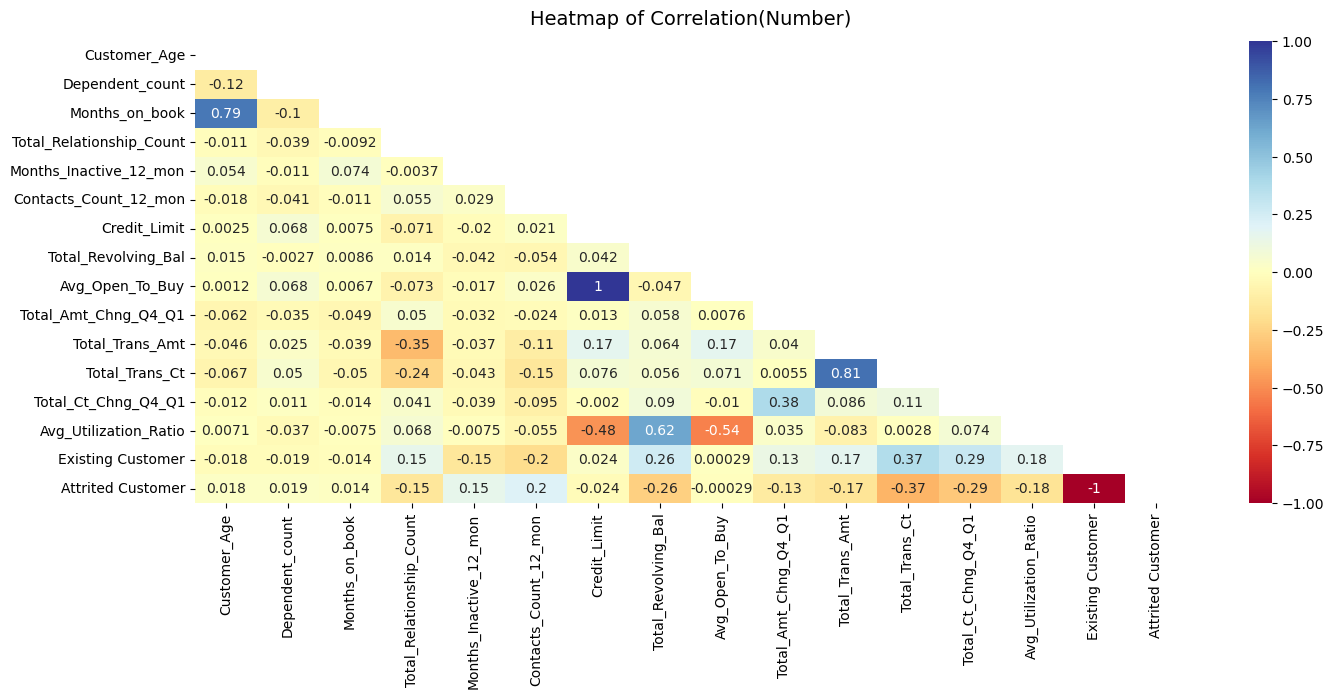

In [37]:
# 基于数值型字段的相关系数

from scipy import stats

num_corr = df_number.corr()  # 相关系数
plt.figure(figsize = (16,6))

mask = np.triu(np.ones_like(num_corr, dtype=np.bool_))
heatmap_number = sns.heatmap(num_corr, mask=mask,
                             vmin=-1, vmax=1,
                             annot=True, cmap="RdYlBu")

heatmap_number.set_title("Heatmap of Correlation(Number)", fontdict={"fontsize": 14}, pad=12)

plt.show()

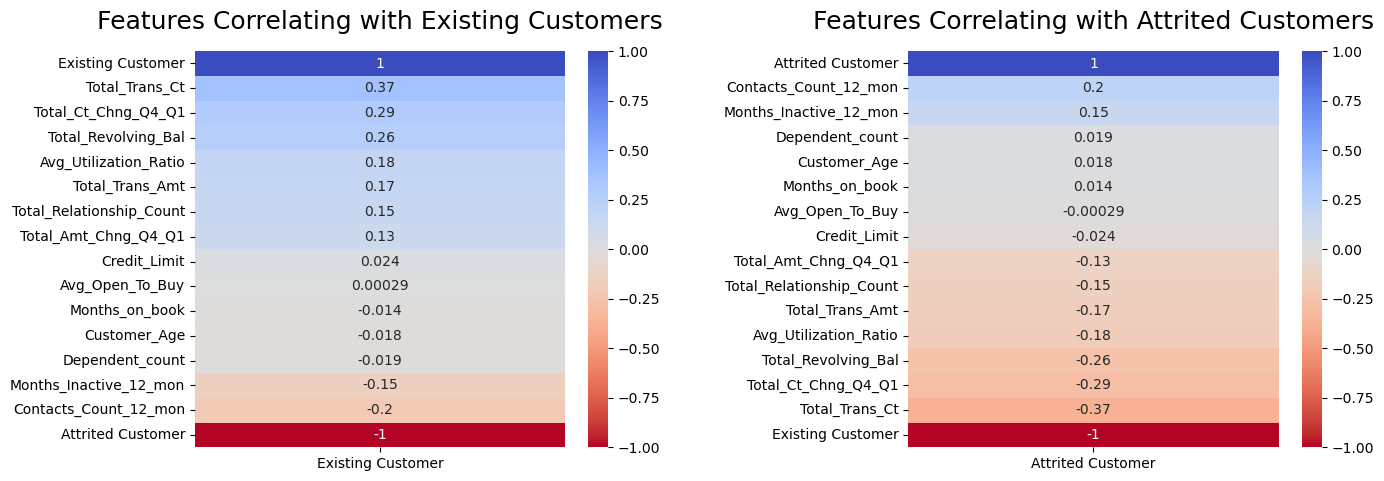

In [38]:
fig, ax = plt.subplots(ncols=2, figsize=(15,6))

heatmap = sns.heatmap(num_corr[["Existing Customer"]].sort_values(by="Existing Customer", ascending=False),
                     ax=ax[0],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Existing Customers",fontdict={"fontsize":18}, pad=16);

heatmap = sns.heatmap(num_corr[["Attrited Customer"]].sort_values(by="Attrited Customer", ascending=False),
                     ax=ax[1],
                     vmin=-1,
                     vmax=1,
                     annot=True,
                     cmap="coolwarm_r")
heatmap.set_title("Features Correlating with Attrited Customers",fontdict={"fontsize":18}, pad=16);

fig.tight_layout(pad=5)

plt.show()

小结：从上面右侧的热力图中能看到下面的字段和流失类型客户是无相关的。相关系数的值在正负0.1之间（右图）

Credit Limit

Average Open To Buy

Months On Book

Age

Dependent Count

现在我们考虑将上面的字段进行删除：

In [39]:
df_model = df.copy()

df_model = df_model.drop(['Credit_Limit','Customer_Age','Avg_Open_To_Buy','Months_on_book','Dependent_count'],axis=1)

### 用户标识编码

In [40]:
df_model['Attrition_Flag'] = df_model['Attrition_Flag'].map({'Existing Customer': 1, 'Attrited Customer': 0})

In [41]:
#剩余字段的独热码：
df_model=pd.get_dummies(df_model)

## 建模

切分数据

在之前已经验证过现有客户和流失客户的数量是不均衡的，我们使用SMOTE(Synthetic Minority Oversampling Technique，通过上采样合成少量的数据)采样来平衡数据。

In [42]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [43]:
# 特征和目标变量

# X = df_model.drop("Attrition_Flag", axis=1, inplace=True)
X = df_model.loc[:, df_model.columns != "Attrition_Flag"]
y = df_model["Attrition_Flag"]

# 分割数据
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


### SMOTE采样

In [44]:
sm = SMOTE(sampling_strategy="minority", k_neighbors=20, random_state=42)

# 实施采样过程
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

### 3种模型

In [45]:
# 1、随机森林

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(X_train_res, y_train_res)

RandomForestClassifier()

#### 一般在使用树模型建模的时候数据不需要归一化。但是在使用支持向量机的时候需要：

In [46]:
# 2、支持向量机

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

# 使用支持向量机数据需要归一化

svm = make_pipeline(StandardScaler(), SVC(gamma='auto'))
svm.fit(X_train_res, y_train_res)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [47]:
Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [48]:
# 3、提升树

from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier(n_estimators=100,  # tree的个数
                                learning_rate=1.0,  # 学习率
                                max_depth=1,   # 叶子的最大深度
                                random_state=42)

gb.fit(X_train_res, y_train_res)

GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=42)

### 模型预测

In [49]:
y_rf = rf.predict(X_test)
y_svm = svm.predict(X_test)
y_gb = gb.predict(X_test)

### 混淆矩阵

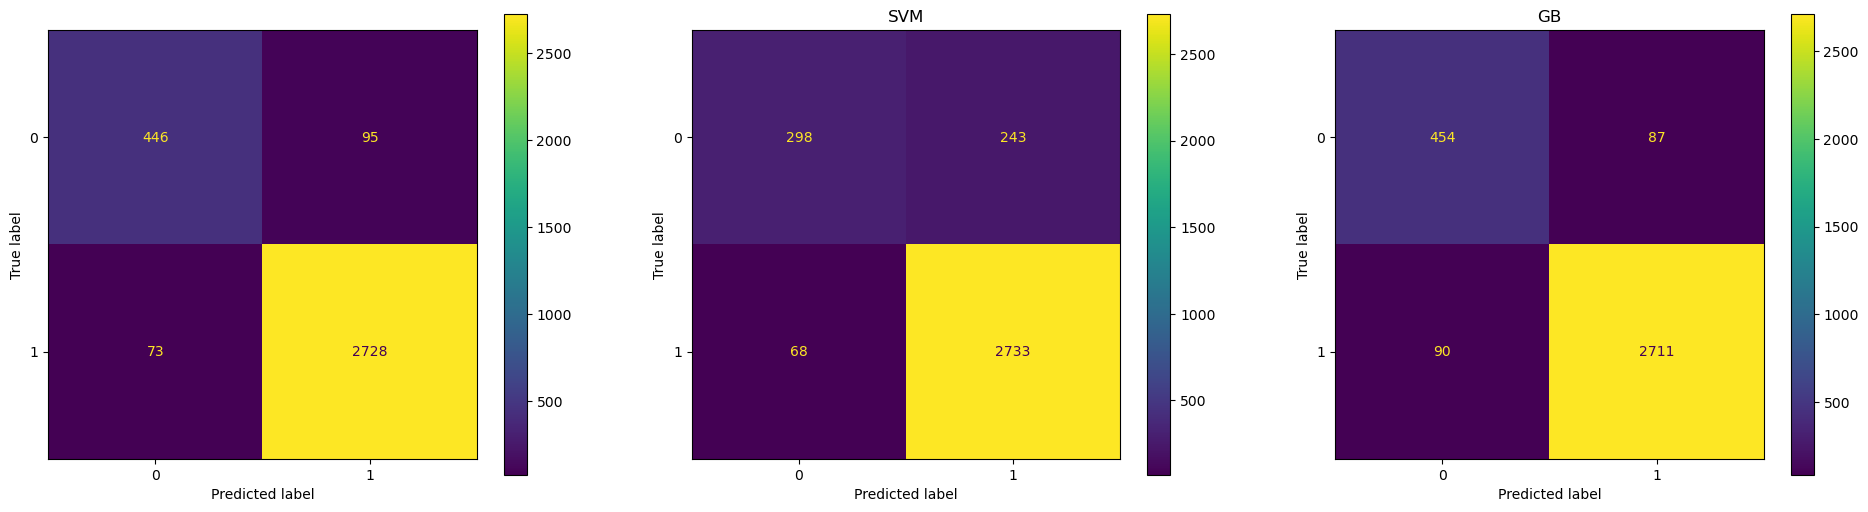

In [50]:
from sklearn.metrics import ConfusionMatrixDisplay

fig,ax=plt.subplots(ncols=3, figsize=(20,6))

ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, ax=ax[0])
#x[0].title.set_text('RF')

ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test, ax=ax[1])
ax[1].title.set_text('SVM')

ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, ax=ax[2])
ax[2].title.set_text('GB')
fig.tight_layout(pad=5)

plt.show()

### 分类模型得分

In [51]:
# classification_report, recall_score, precision_score, f1_score

from sklearn.metrics import classification_report, recall_score, precision_score, f1_score

print('Random Forest Classifier')
print(classification_report(y_test, y_rf))

print('------------------------')
print('Support Vector Machine')
print(classification_report(y_test, y_svm))

print('------------------------')
print('Gradient Boosting')
print(classification_report(y_test, y_gb))


Random Forest Classifier
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.90      0.91      3342
weighted avg       0.95      0.95      0.95      3342

------------------------
Support Vector Machine
              precision    recall  f1-score   support

           0       0.81      0.55      0.66       541
           1       0.92      0.98      0.95      2801

    accuracy                           0.91      3342
   macro avg       0.87      0.76      0.80      3342
weighted avg       0.90      0.91      0.90      3342

------------------------
Gradient Boosting
              precision    recall  f1-score   support

           0       0.83      0.84      0.84       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg

#### 从3种模型的混淆矩阵和分类模型的相关评价指标来看：可以看到随机森林和提升树的结果都是优于支持向量机的

### 模型调参优化

针对随机森林和提升树模型采用两种不同的调参优化方法：

随机森林：随机搜索调参

梯度提升树：网格搜索调参

随机搜索调参-随机森林模型

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# n_estimators  # 随机森林中树的个数

max_features = ['auto', 'sqrt']

In [54]:
# 每个tree的最大叶子数
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

max_depth

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None]

In [55]:
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

### 随机搜索参数

In [56]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [57]:
rf_random = RandomizedSearchCV(
    estimator = rf,  # rf模型
    param_distributions=random_grid, # 搜索参数
    n_iter=30,
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=-1)

rf_random.fit(X_train_res, y_train_res)
print(rf_random.best_params_)


Fitting 3 folds for each of 30 candidates, totalling 90 fits


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this p

[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=   1.3s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.0s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.1s
[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=600; total time=   5.2s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.4s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=600; total time=   5.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   8.8s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=400; total time=   3.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   8.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   8.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1400; total time=   9.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   1.2s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.0s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.2s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1200; total time=   7.2s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=400; total time=   3.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  12.0s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=2000; total time=  17.6s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=  12.3s
[CV] END bootstrap=False, max_depth=

/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=800; total time=   7.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   6.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1000; total time=   6.7s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.8s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1200; total time=  10.5s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   8.8s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   9.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=600; total time=   4.0s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  13.8s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  14.5s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=  14.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1000; total time=   6.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   7.2s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.5s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.5s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1600; total time=   9.8s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  15.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  16.1s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  13.8s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1800; total time=  15.9s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.5s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1600; total time=  14.4s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   7.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1200; total time=   7.5s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.2s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.6s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1400; total time=   9.5s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.1s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.6s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=   9.2s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.2s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  10.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.7s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.6s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.0s


/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=  11.2s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  12.9s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  10.3s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=600; total time=   5.8s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  10.4s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=1600; total time=  10.6s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=2000; total time=  13.4s
[CV] END bootstrap=True, max_depth=11

/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 80, 'bootstrap': True}


使用搜索参数建模
使用上面搜索之后的参数再次建模：

/Users/wentaozhang/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.



Random Forest Classifier (Optimized)
              precision    recall  f1-score   support

           0       0.86      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342



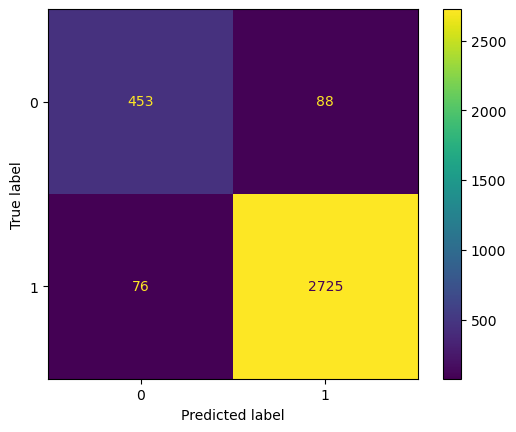

In [58]:
rf_clf_search= RandomForestClassifier(n_estimators=1400,
                                   min_samples_split=2,
                                   min_samples_leaf=1,
                                   max_features='auto',
                                   max_depth=110,
                                   bootstrap=True)

rf_clf_search.fit(X_train_res,y_train_res)
y_rf_opt=rf_clf_search.predict(X_test)

print('Random Forest Classifier (Optimized)')

print(classification_report(y_test, y_rf_opt))

_rf_opt=ConfusionMatrixDisplay.from_estimator(rf_clf_search, X_test, y_test)

#### 调参后的混淆矩阵：左上角的449变成452，说明分类的更加准确了

### 网格搜索调参-提升树模型
网格搜索参数

In [59]:
from sklearn.model_selection import GridSearchCV

param_test1 = {'n_estimators':range(20,100,10)}
param_test1

{'n_estimators': range(20, 100, 10)}

In [60]:
# 实施搜索

grid_search1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=1.0,  # 待搜索模型
                                                               min_samples_split=500,
                                                               min_samples_leaf=50,
                                                               max_depth=8,
                                                               max_features='sqrt',
                                                               subsample=0.8,
                                                               random_state=10),
                        param_grid = param_test1, # 搜索参数
                        scoring='roc_auc',
                        n_jobs=4,
                        cv=5)

grid_search1.fit(X_train_res,y_train_res)

grid_search1.best_params_

{'n_estimators': 90}

#### 使用搜索参数建模

Gradient Boosting (Optimized)
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       541
           1       0.97      0.97      0.97      2801

    accuracy                           0.95      3342
   macro avg       0.91      0.91      0.91      3342
weighted avg       0.95      0.95      0.95      3342

0.8428835489833642


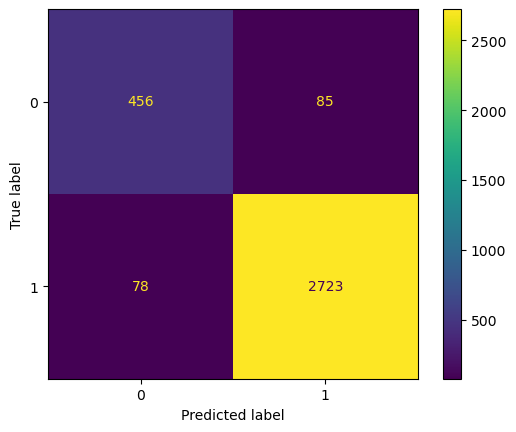

In [61]:
gb_clf_opt=GradientBoostingClassifier(n_estimators=90,  # 搜索到的参数90
                                      learning_rate=1.0,
                                      min_samples_split=500,
                                      min_samples_leaf=50,
                                      max_depth=8,
                                      max_features='sqrt',
                                      subsample=0.8,
                                      random_state=10)
# 再次拟合
gb_clf_opt.fit(X_train_res,y_train_res)

y_gb_opt=gb_clf_opt.predict(X_test)
print('Gradient Boosting (Optimized)')
print(classification_report(y_test, y_gb_opt))

print(recall_score(y_test,y_gb_opt,pos_label=0))
_gbopt=ConfusionMatrixDisplay.from_estimator(gb_clf_opt, X_test, y_test)
_gbopt


#### 左上角的分类数目从454提升到456，也有一定的提升，但是效果并不是很明显

#### 本notebook从一份用户相关的数据出发，从数据预处理、特征工程和编码，到建模分析和调参优化，完成了整个用户流失预警的全流程分析。整体模型的结果准确率达到了95%，召回率也达到了84.2%